In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

In [6]:
# print(boston.DESCR) #describe

In [8]:
columns=boston.feature_names

In [10]:
df_data=pd.DataFrame(boston.data,columns=columns) #カラムの指定をする

In [12]:
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
df_target=pd.DataFrame(boston.target,columns=['MEDV'])
df_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [17]:
df=pd.concat((df_data,df_target),axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Seabornで散布図行列を作る

In [19]:
df_pickup=df.loc[:,['LSTAT','INDUS','DIS','RM','MEDV']]

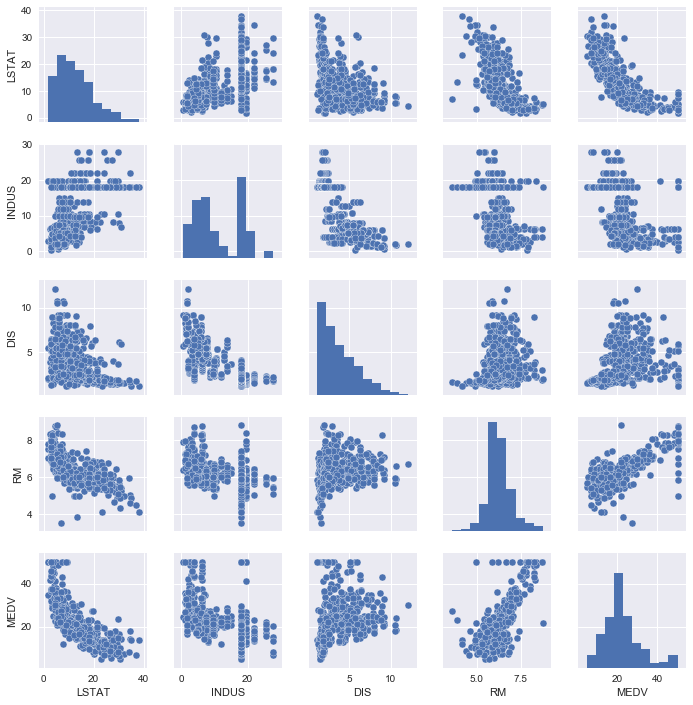

In [21]:
import seaborn as sns
sns.pairplot(df_pickup,size=2.0)
plt.show()

分布を見ながらそれが現実のどういう状態を表しているのかを解釈する。
INDUSには二つの山がある。⇨工業地帯と住宅地帯
MEDVには離れ小島がある。⇨５０万ドル以上でまとめてしまっている。⇨不自然な丸め。ノイズ

In [22]:
df.corr() #df.corr()で相関行列。見づらい

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


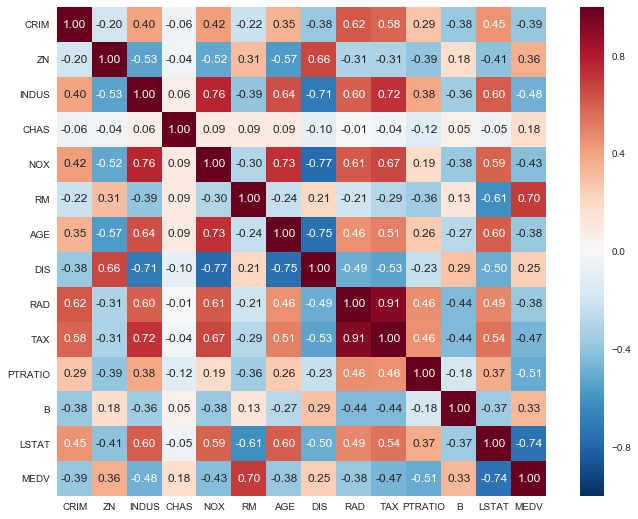

In [24]:
#Seabornでヒートマップを表示
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,square=True,fmt='.2f')
plt.show()

MEDVと直線的な関係が強い変数はRMとLSTATであることが見てわかる。

In [26]:
df.describe() #describe()でいろんな統計量を確認できる。

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
X=df.loc[:,['LSTAT','RM']].values #データフレーム.valuesでnp.array(df)と同じ処理
X

array([[ 4.98 ,  6.575],
       [ 9.14 ,  6.421],
       [ 4.03 ,  7.185],
       ..., 
       [ 5.64 ,  6.976],
       [ 6.48 ,  6.794],
       [ 7.88 ,  6.03 ]])

In [32]:
# X=np.array(df.loc[:,['LSTAT','RM']])
# X

In [34]:
y=df.loc[:,['MEDV']].values
# y

In [36]:
#test-trainに分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [39]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(506, 2)
(506, 1)
(354, 2)
(354, 1)
(152, 2)
(152, 1)


In [40]:
#学習
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [53]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
#定数項を確認
lr.intercept_

array([-2.53724672])

In [43]:
#係数を確認
lr.coef_

array([[-0.6418309 ,  5.27350522]])

In [44]:
# 新しい物件についてLSTATとRMを入力
# ([[LSTAT, RM]])
X_new = np.array([[12, 3]])

# 販売価格を入力
y_prop = 15

# 適正価格を予測
y_pred = lr.predict(X_new)

# 割高度を計算
price_ratio = y_prop / y_pred

# 出力
print('y_prop      : %.2f' % y_prop)
print('y_pred      : %.2f' % y_pred)
print('price_ratio : %.2f' % price_ratio)

y_prop      : 15.00
y_pred      : 5.58
price_ratio : 2.69


# 決定係数はモデルの当てはまりのよさを測る
回帰平面に平行なばらつきと、垂直なばらつきがあり、垂直なばらつきの割合が高いとR^2が小さくなる
0.5未満だと当てはまりが悪い。<br>
回帰の場合は制度より決定係数で測ったほうがいいのか？

In [45]:
print('R^2')
print('train : %.3f'%lr.score(X_train,y_train))
print('test : %.3f'%lr.score(X_test,y_test))

R^2
train : 0.651
test : 0.607


In [46]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [47]:
# 自由度調整済み決定係数を出力
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train: 0.648955
test : 0.601704


誤差関数が２乗の形なのでMSEは元のデータの２乗の次元になってしまう。RMSEにすることでそれを１乗の次元に戻している。

In [54]:
from sklearn.metrics import mean_squared_error as mse
print('RMSE train and test')
print('train : %.3f'%(mse(y_train,lr.predict(X_train))**(1/2)))
print('test : %.3f' % (mse(y_test, lr.predict(X_test)) ** (1/2)))

RMSE train and test
train : 5.439
test : 5.721


In [55]:
# 残差プロットを行う関数を定義
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-10, xmax=50, color='red') # 残差0の線を表示
    plt.xlim([-10, 50])                             # 表示する横軸の範囲を指定
    plt.show()

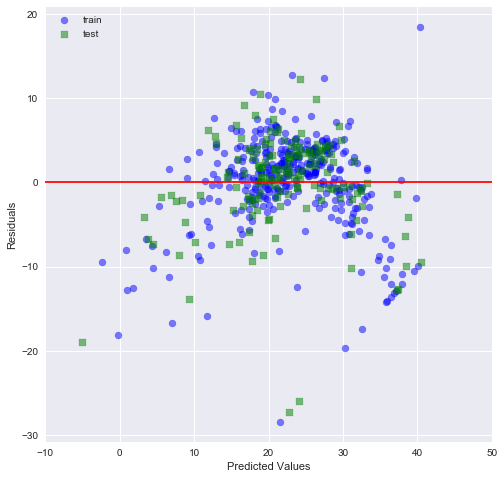

In [56]:
# 残差プロットを出力
res_plot(y_train, lr.predict(X_train), y_test, lr.predict(X_test))

残差プロットは常に予測値と残差だけによってプロットされるので常に２次元であり見やすい。　<br>
右下に不自然な直線関係があるが、これらは全て５０が正解だが、小さく予測されてしまったデータの集まり。<br>
50万ドル以上の値段がついていたのに５０万ドルに丸められていたデータが予測に失敗していることがわかる。

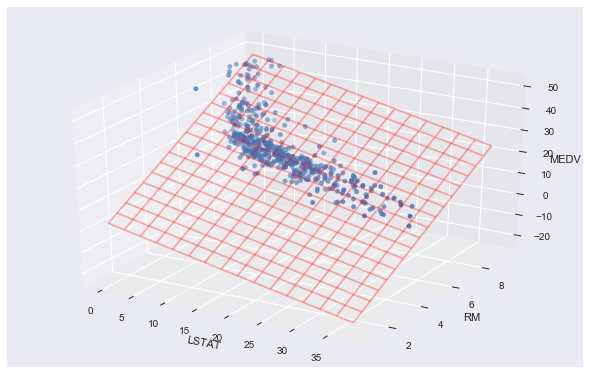

In [59]:
# 3次元での可視化
from mpl_toolkits.mplot3d import Axes3D

ax=Axes3D(plt.figure(figsize=(8,5)))
ax.scatter(df['LSTAT'],df['RM'],df['MEDV'])

#回帰平面
X_grid, Y_grid = np.meshgrid(np.arange(0, 40, 2.5), np.arange(1, 10, 0.5))
#係数定義
w0 = lr.intercept_
w1 = lr.coef_[0, 0]
w2 = lr.coef_[0, 1]
Z = w0 + w1*X_grid + w2*Y_grid

# 回帰平面を表示
ax.plot_wireframe(X_grid, Y_grid, Z, alpha=0.3, color='red')

# 座標軸のラベルを指定
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

# ここまでの内容でグラフをプロット
plt.show()

In [65]:
# データを標準化することで変数が寄与する大きさを等しくする。
from sklearn.preprocessing import StandardScaler #スタンダードスケーラー
ss=StandardScaler()
X_std=ss.fit_transform(boston.data) #全ての説明変数をスケーリング
y_std=ss.fit_transform(y)

In [89]:
X_std_train,X_std_test,y_std_train,y_std_test=train_test_split(X_std,y_std,test_size=0.3,random_state=0)

In [68]:
# print(X_std[:5])
print(y_std.mean())
print(X_std.mean())

-5.19566822591e-16
-1.12338772452e-15


In [70]:
print(y_std.std())
print(X_std.std())

1.0
1.0


In [90]:
lr_std=LinearRegression()
lr_std.fit(X_std_train,y_std_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
lr_std.coef_[0].reshape(len(lr_std.coef_[0]),1)

array([[-0.1120351 ],
       [ 0.11265071],
       [ 0.0088476 ],
       [ 0.06939951],
       [-0.20500475],
       [ 0.29405376],
       [-0.03016156],
       [-0.34343662],
       [ 0.22864502],
       [-0.20280642],
       [-0.23986139],
       [ 0.06901615],
       [-0.37899188]])

In [92]:
columuns=boston.feature_names

In [93]:
pd.DataFrame(lr_std.coef_[0].reshape(len(lr_std.coef_[0]),1),index=columns,columns=['係数']).sort_values(by='係数')

,係数
LSTAT,-0.378992
DIS,-0.343437
PTRATIO,-0.239861
NOX,-0.205005
TAX,-0.202806
CRIM,-0.112035
AGE,-0.030162
INDUS,0.008848
B,0.069016
CHAS,0.069400


In [95]:
print('adjusted R^2')
print('train: %3f' % adjusted(lr_std.score(X_std_train, y_std_train), len(y_std_train), 2))
print('test: %3f' % adjusted(lr_std.score(X_std_test, y_std_test), len(y_test), 2))

adjusted R^2
train: 0.763114
test: 0.669146


多重共線性のある変数だと、回帰平面の軸が似ているため平面が安定しない